In [1]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import wfdb
import biosignalsnotebooks as bsnb
from wfdb import processing
from matplotlib import pyplot as plt
from scipy import signal
from biosppy.signals import ecg
np.set_printoptions(threshold=sys.maxsize)
import umap
import sklearn.utils as slu
from sklearn.model_selection import LeaveOneOut

In [2]:
store = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/100'
record = wfdb.rdrecord(store, sampto=100)
# wfdb.plot_wfdb(record, title='Record 100 from MIT-BIH Arrhythmia database') 
# display(record.__dict__)

In [3]:
# data, header = bsnb.load_signal("ecg_4000_Hz", get_header=True)

In [4]:
sig, fields = wfdb.rdsamp(store, channels=[0])
# xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
# xqrs.detect()
# wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])
ann_ref = wfdb.rdann(store, 'atr')
r_peaks = ann_ref.sample[0:-1]
print(r_peaks)

[    18     77    370    662    946   1231   1515   1809   2044   2402
   2706   2998   3282   3560   3862   4170   4466   4764   5060   5346
   5633   5918   6214   6527   6823   7106   7391   7670   7953   8245
   8539   8837   9141   9431   9710   9998  10282  10591  10894  11191
  11480  11781  12066  12350  12645  12949  13266  13562  13842  14131
  14423  14710  15011  15310  15607  15899  16183  16464  16755  17058
  17358  17657  17947  18227  18514  18795  19080  19388  19693  19989
  20271  20554  20837  21131  21423  21729  22029  22321  22603  22881
  23164  23453  23756  24053  24345  24625  24913  25197  25485  25779
  26088  26387  26670  26952  27237  27536  27833  28132  28431  28727
  29014  29294  29580  29873  30182  30487  30779  31065  31348  31635
  31927  32224  32529  32836  33127  33403  33691  33980  34274  34575
  34870  35168  35455  35736  36016  36309  36605  36916  37215  37499
  37782  38071  38356  38651  38950  39252  39547  39825  40096  40382
  4067

In [5]:
# file_path = glob.glob('./mit-bih-arrhythmia-database-1.0.0/*.atr')
# files = [i[:-4] for i in file_path]
# files.sort()


# file = './mit-bih-arrhythmia-database-1.0.0/100'

# ann_ref = wfdb.rdann(file, 'atr')

# number_of_rpeaks = len(ann_ref.symbol)

# values = np.zeros((48,2))
# classes = ['N','R','L','V','A','E']
# for i in range(len(files)):
#     signals, fields = wfdb.rdsamp(files[i])
#     annotation = wfdb.rdann(files[i], 'atr')
#     for j in classes:
#         ids = np.in1d(annotation.symbol, j)
#         beats = annotation.sample[ids]
#         values[i] = [j,len(beats)]

# print(values)



# n = ['N']
# v = ['V']

# check_normal = np.in1d(ann_ref.symbol, n)
# check_v = np.in1d(ann_ref.symbol, v)

# normal_beats = ann_ref.sample[check_normal]
# v_beats = ann_ref.sample[check_v]

# print(len(check_normal))

# comparitor = processing.compare_annotations(ann_ref.sample[1:], xqrs.qrs_inds, int(0.1 * fields['fs']), sig[:,0])
# comparitor.print_summary()
# comparitor.plot()

In [6]:
def get_data(path):
    file_path = glob(path)
    files = [i[:-4] for i in file_path]
    files.sort()
    return files

In [7]:
path = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/*.atr'
file_list = get_data(path)


## Histogram

(112647,)


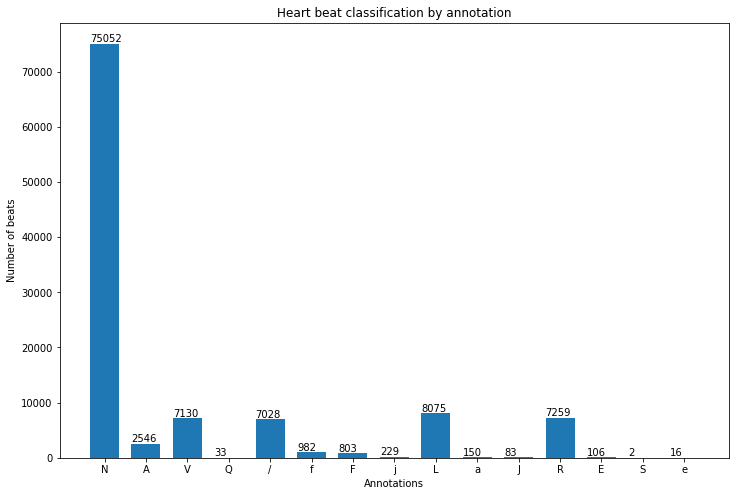

In [8]:

# print(len(get_data()))


ann_list = []
for i in range(len(file_list)): #going through each of the 48 files...
    data_file = file_list[i] #one file of the 48
    record = wfdb.rdsamp(data_file)  #returns an array of the sample
    ann_ref = wfdb.rdann(data_file, 'atr') #reading annotations in the file
    ann_list.extend(ann_ref.symbol)
    
ann_array = np.array(ann_list)
print(ann_array.shape)
# annp = wfdb.rdann(file_list[7], 'atr')
# print(len(annp.symbol))
# print(annp.label_store)



actual_beats = ['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']

ann_dict = {}

for i in ann_array:
    ann_dict[i] = ann_dict.get(i,0)+1

ann_dict = {k:v for k,v in ann_dict.items() if k in actual_beats}


plt.figure(figsize=(12,8))

xlocs, xlabs = plt.xticks()

bars = plt.bar(list(ann_dict.keys()), ann_dict.values(), width=.7)
plt.title("Heart beat classification by annotation")
xlocs = [i for i in ann_dict.keys()]
ylabs = [i for i in ann_dict.values()]

plt.xlabel("Annotations")
plt.ylabel("Number of beats")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 300, yval)

# xlocs = [i/2 for i in range(len(ann_dict.keys()))]
# for i, v in enumerate(ann_dict.values()):
#     plt.text((xlocs[i] - 0.25, v + 0.01, str(v)))

# print(np.array(ann_ref.symbol).shape)
# print(record[1].get('fs'))
# print(record[0].shape)
# print(len(ann_ref.num)) #prints number of annotations (no of beats) 
# # num is the labelled annotation number for each annotation
# print(ann_ref.symbol)

## Visualising the Data per Patient

In [9]:
#Visualising the data
file_index = 1 #0 to 47 files in the database

current_file = file_list[file_index]

record = wfdb.rdsamp(current_file)
ann_ref = wfdb.rdann(current_file, 'atr')
r = record[0].T
print(r.shape)


samp_start = 0
samp_end = 6500
samples = samp_end - samp_start
#picking first record, picking first channel, 
#going from samp_start to samp_end in that channel
channel = record[0][samp_start:samp_end, 1]
#record is coming fromt the FIRST cell using the first file, change it there to see next file
# time = (np.arange(samples, dtype='float')+ samp_start)/record[1].get('fs')

# plt.figure(figsize=(20,10))
# plt.plot(time,channel)


peak_location=np.logical_and(ann_ref.sample >= samp_start, ann_ref.sample < samp_end)
#.sample returns a numpy array containing the annotation locations in samples relative to the beginning of the record
#i.e., where each beat is
anns = ann_ref.sample[peak_location] - samp_start
ann_types = np.array(ann_ref.symbol)
req_ann_types = ann_types[peak_location]

print(ann_ref.sample.shape)
print(anns.shape)

# print(ann_types.shape, req_ann_types.shape)


# ann_time = time[anns]
# plt.plot(ann_time, np.ones_like(ann_time)*channel.max()*1.4,'ro')


# for index, annotation in enumerate(anns):
#     plt.annotate(ann_types[index], xy = (time[annotation], channel.max()*1.1))

    
# plt.xlim([samp_start / record[1].get('fs'), (samp_end/record[1].get('fs'))+1])
# plt.xlabel('offset')
# plt.ylabel(record[1].get('sig_name')[1])
# plt.show()
# q = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])
# print(q.shape)
# for i, z in enumerate(q):
#     print(z)

(2, 650000)
(1874,)
(21,)


In [10]:
arr = np.array([[1,2,3,4],[5,6,7,8]])
print(arr.shape)
s = np.array([1,2])
a = np.split(arr,s)
print(a)

(2, 4)
[array([[1, 2, 3, 4]]), array([[5, 6, 7, 8]]), array([], shape=(0, 4), dtype=int64)]


In [11]:
import tensorflow as tf

In [37]:
for file in file_list:
    
    path = file.split('/')
    fn = path[-1]
    record = wfdb.rdsamp(file)
    ecg_val = record[0].T # 2, 650000
    ann_ref = wfdb.rdann(file,'atr')
    ann_list = np.array(ann_ref.symbol)
    ann_number = np.zeros_like(ann_list, dtype='float')
    
    # encode the annotations as numbers
    for annid, anno in enumerate(ann_list):
        if anno == 'N':
            ann_number[annid] = 1.0
        elif anno == 'L':
            ann_number[annid] = 2.0
        elif anno == 'R':
            ann_number[annid] = 3.0
        elif anno == 'A':
            ann_number[annid] = 4.0
        elif anno == 'V':
            ann_number[annid] = 5.0
        elif anno == 'F':
            ann_number[annid] = 6.0
        elif anno == 'f':
            ann_number[annid] = 7.0
        elif anno == '/':
            ann_number[annid] = 8.0
            
    all_ann_numbers = np.zeros_like(ecg_val[0], dtype='float')
    all_ann_numbers[ann_ref.sample] = ann_number
    
    for ch_id, channel in enumerate(ecg_val): #enumerates the 2 channels - so 0 and 1
        channel_name = record[1].get('sig_name')[ch_id]
        print("ECG channel: ", channel_name)
        
        # center the r peak
        rpeak_indices = ann_ref.sample[1:-1] #2272

        all_beats = []
        for peak in rpeak_indices:
            start,end = peak-256//2, peak+256//2
            if start < 0:
                start = 0
            diff = 256 - len(channel[start:end])
            if diff > 0:
                padding = np.zeros(diff, dtype='float')
                padded_channel = np.append(padding, channel[start:end])
                all_beats.append(padded_channel)
            else:
                all_beats.append(channel[start:end])

        for i, i_val in enumerate(rpeak_indices):
            # obtain annotation for each beat
            if i_val < 10:
                from_i = 0
            else:
                from_i = i_val - 10
            to_i = i_val + 10
            anno = all_ann_numbers[from_i:to_i].max()

            
            # standardise the data
            all_beats[i] = (all_beats[i]-np.mean(all_beats[i]))/np.std(all_beats[i])
            
            # append the annotation to each beat
            all_beats[i] = np.append(all_beats[i], anno)
            
            # append file number
            all_beats[i] = np.append(all_beats[i], fn)

            # append channel number (0 or 1)
            all_beats[i] = np.append(all_beats[i], ch_id)
        
        # save to file per patient
        all_beats = np.array(all_beats, dtype='float64')
        savedata = all_beats 
        print(outfn = 'data_ecg/'+fn+'_'+channel_name+'.csv')
        print('    Generating ', outfn)
        if not os.path.exists('data_ecg/'):
            os.makedirs('data_ecg/')
        with open(outfn, "wb") as fin:
            np.savetxt(fin, savedata, delimiter=",", fmt='%f')

ECG channel:  MLII
    Generating  data_ecg/100_MLII.csv
ECG channel:  V5
    Generating  data_ecg/100_V5.csv
ECG channel:  MLII
    Generating  data_ecg/101_MLII.csv
ECG channel:  V1
    Generating  data_ecg/101_V1.csv
ECG channel:  V5
    Generating  data_ecg/102_V5.csv
ECG channel:  V2
    Generating  data_ecg/102_V2.csv
ECG channel:  MLII
    Generating  data_ecg/103_MLII.csv
ECG channel:  V2
    Generating  data_ecg/103_V2.csv
ECG channel:  V5
    Generating  data_ecg/104_V5.csv
ECG channel:  V2
    Generating  data_ecg/104_V2.csv
ECG channel:  MLII
    Generating  data_ecg/105_MLII.csv
ECG channel:  V1
    Generating  data_ecg/105_V1.csv
ECG channel:  MLII
    Generating  data_ecg/106_MLII.csv
ECG channel:  V1
    Generating  data_ecg/106_V1.csv
ECG channel:  MLII
    Generating  data_ecg/107_MLII.csv
ECG channel:  V1
    Generating  data_ecg/107_V1.csv
ECG channel:  MLII
    Generating  data_ecg/108_MLII.csv
ECG channel:  V1
    Generating  data_ecg/108_V1.csv
ECG channel:  MLII

In [38]:
all_data = np.empty(shape=[0,259])
print(all_data.shape)
csv_files = glob('./data_ecg/*.csv')

for file in csv_files:
    heartbeat = np.loadtxt(file, delimiter=',')
    all_data = np.append(all_data, heartbeat, axis=0)

print("loaded all data")
print(all_data.shape)

(0, 259)
loaded all data
(225102, 259)


In [66]:
print(np.where(all_data[:,-3]==1.0)[0].shape)
print(np.where(all_data[:,-3]==2.0)[0].shape)
print(np.where(all_data[:,-3]==3.0)[0].shape)
print(np.where(all_data[:,-3]==4.0)[0].shape)
print(np.where(all_data[:,-3]==5.0)[0].shape)
print(np.where(all_data[:,-3]==6.0)[0].shape)
print(np.where(all_data[:,-3]==7.0)[0].shape)
print(np.where(all_data[:,-3]==8.0)[0].shape)

(150034,)
(16144,)
(14512,)
(5088,)
(14260,)
(1606,)
(1964,)
(14048,)


In [ ]:
# find ecg index of each beat
# find the min of these indices e.g. 25
# then delete all the extra that have > 25 before the r peak
# so all beats are at 25 now
# print(all_data[0,0])
# all_data_ecg = ecg.ecg(signal=all_data[:,:-3], sampling_rate=360, show=False)
# rpeak_alldata = all_data_ecg['rpeaks']
# print(rpeak_alldata.shape)
max_val = np.expand_dims(np.max(all_data[:,:-3], axis=1),axis=1) #all the max signal values
print(max_val[2])
ecg_values = all_data[:,:-3]
max_indices = np.argmax(ecg_values, axis=1)
print(ecg_values.shape)
print(np.min(max_indices))
print(np.where(max_indices==0))
print(max_indices[3332])
# print(type(ecg_values))
# sorter = np.argsort(ecg_values)
# print(sorter[np.searchsorted(ecg_values, max_val, sorter=sorter)])
# rpeak_index, = np.where(np.isclose(ecg_values, max_val), axis=1)


## Visualise the heartbeats

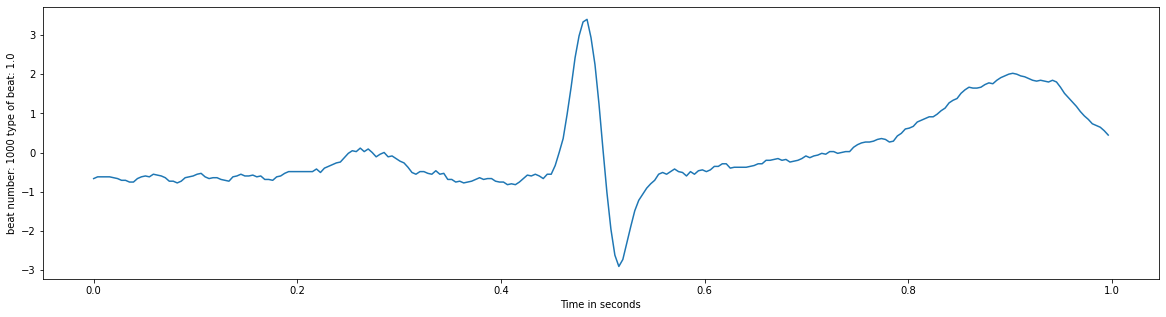

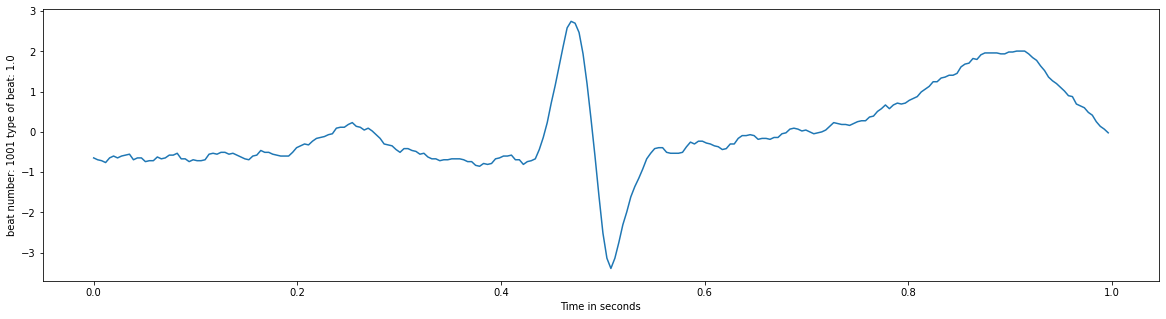

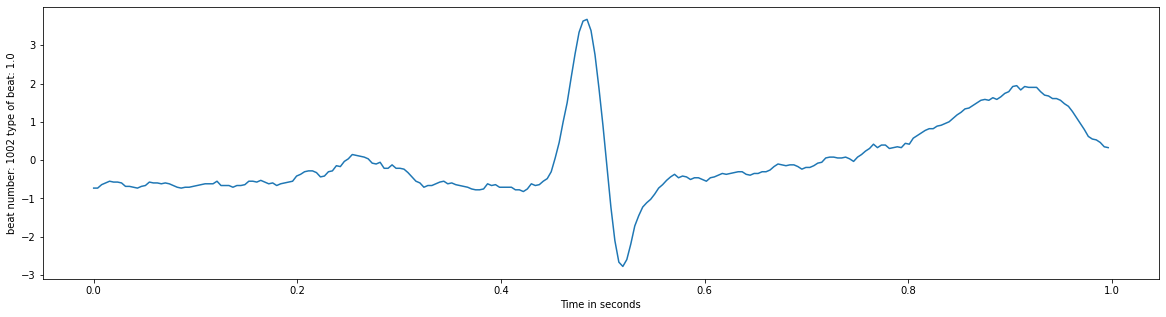

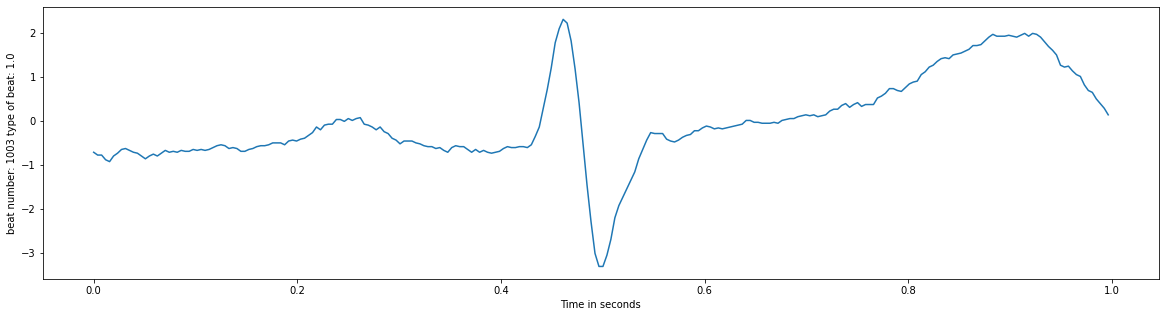

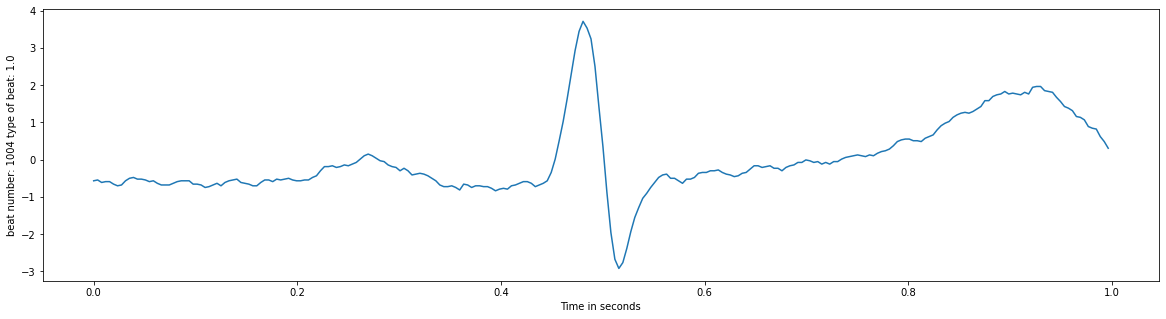

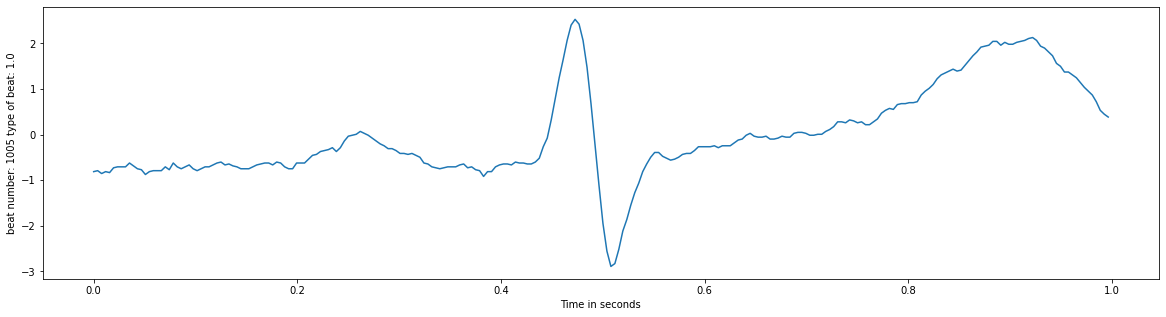

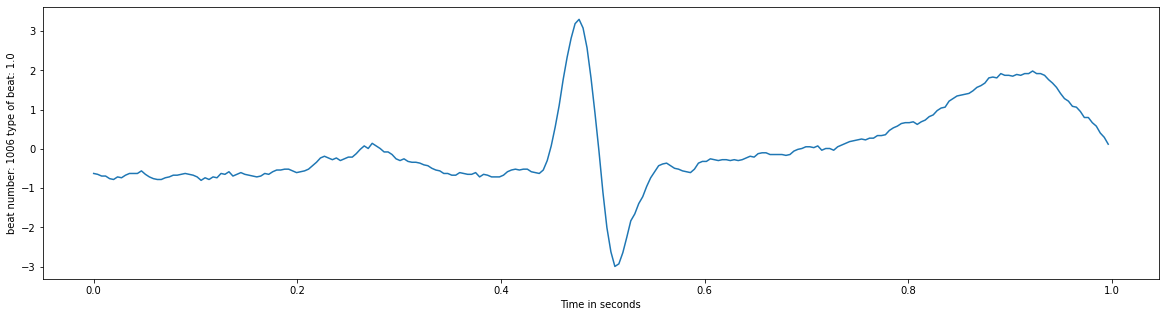

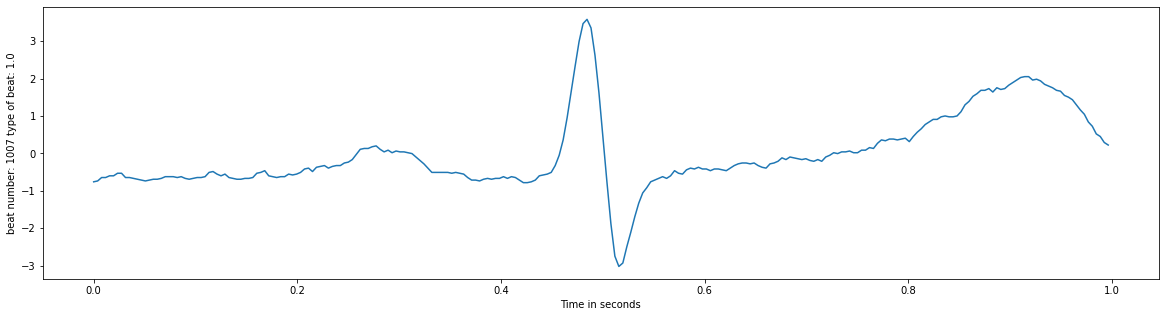

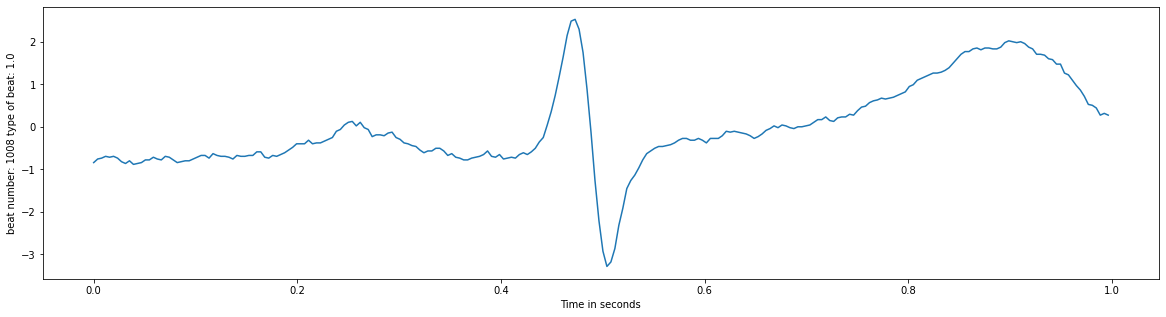

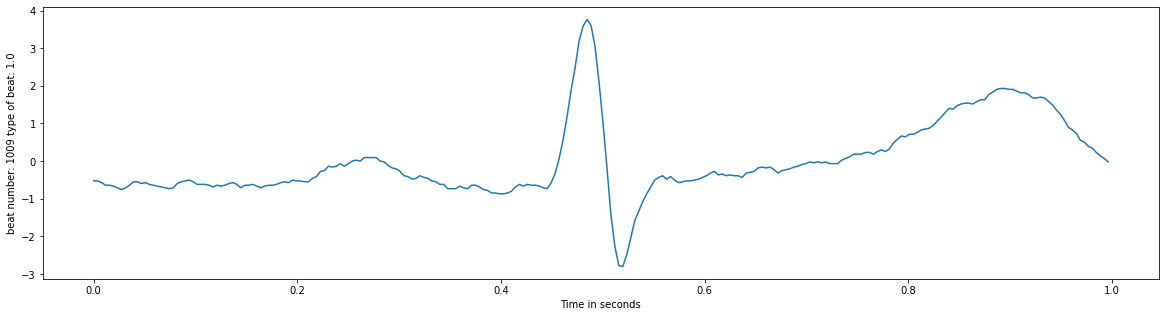

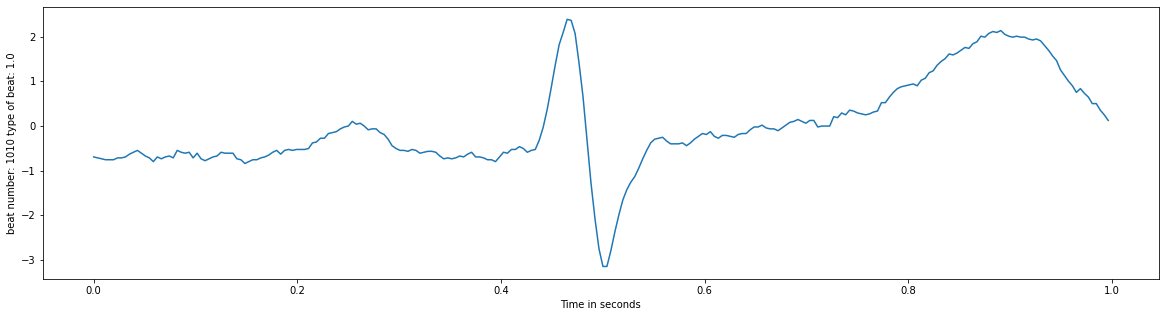

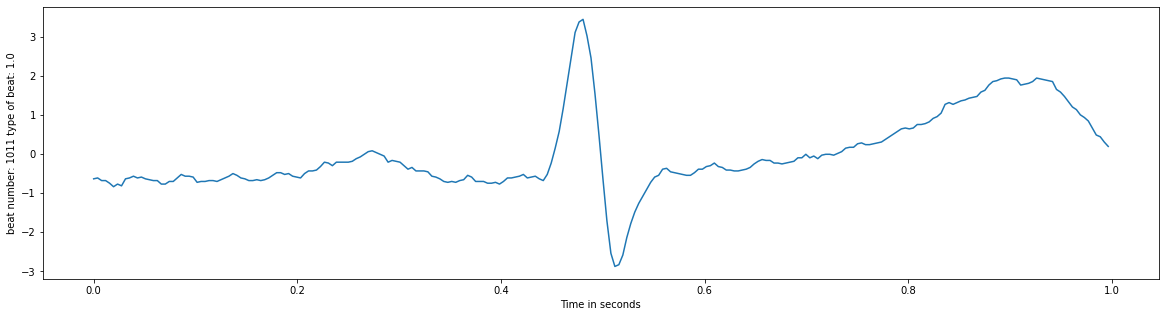

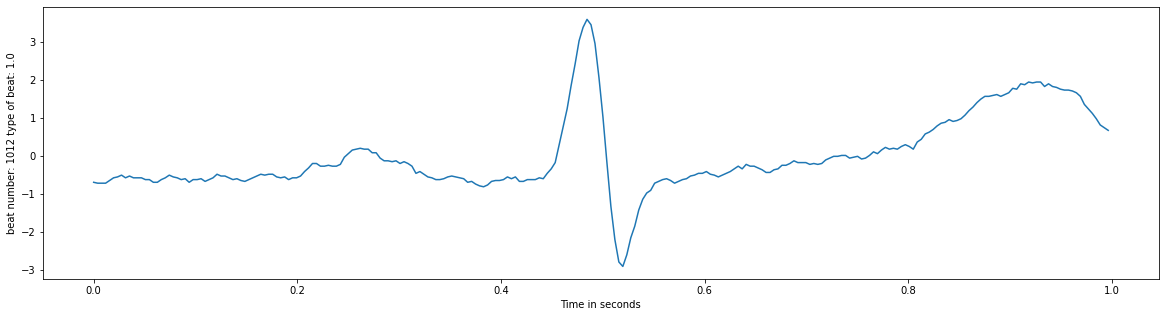

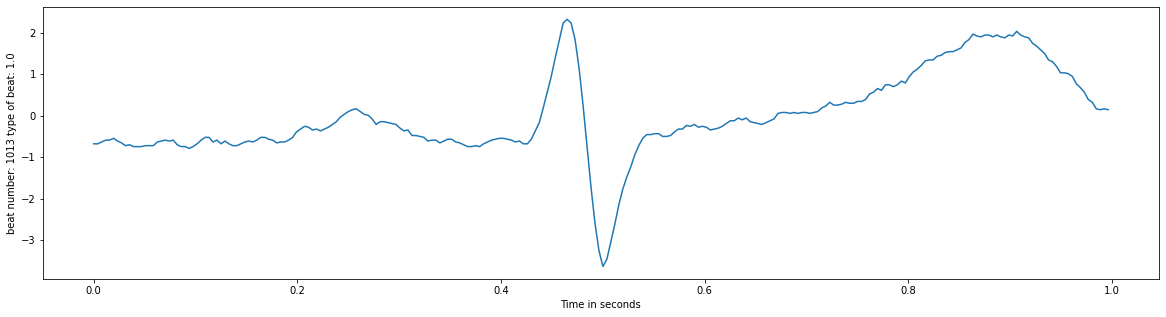

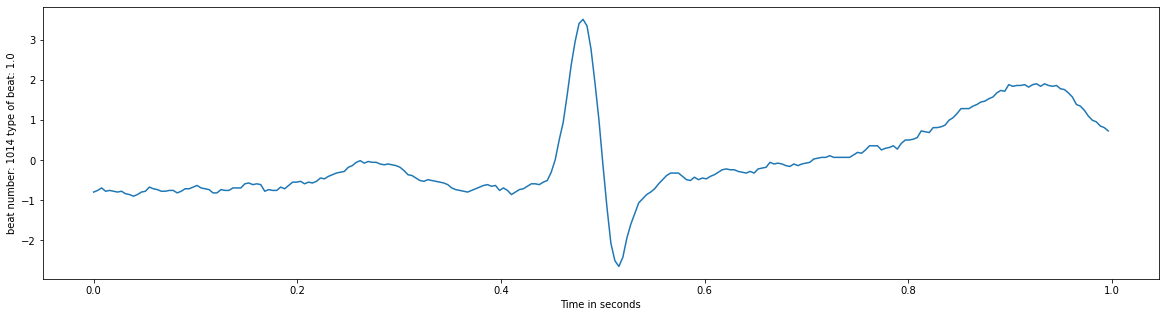

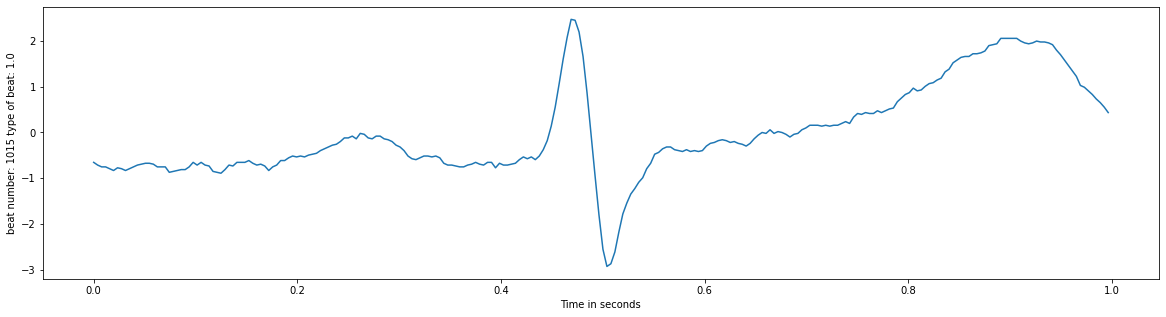

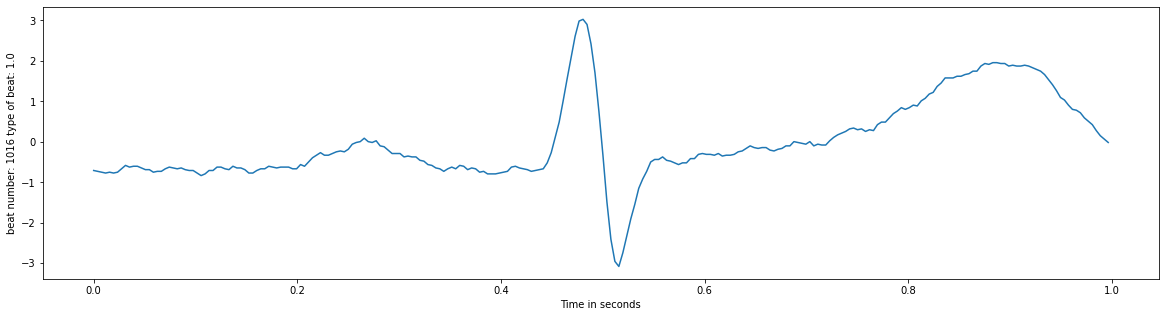

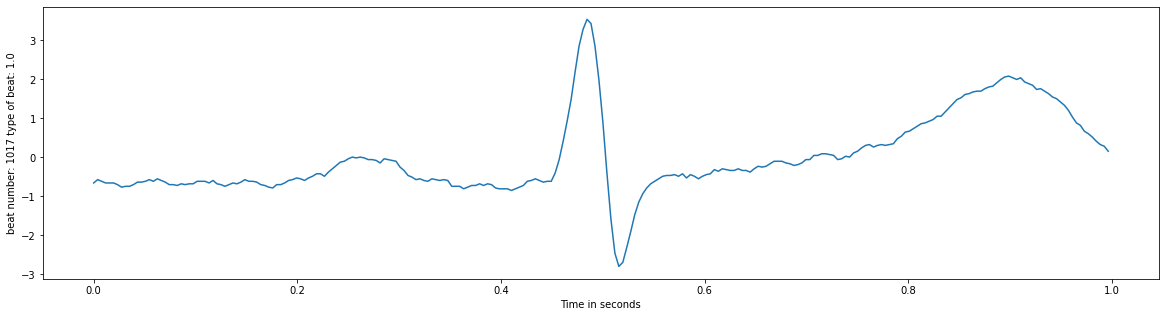

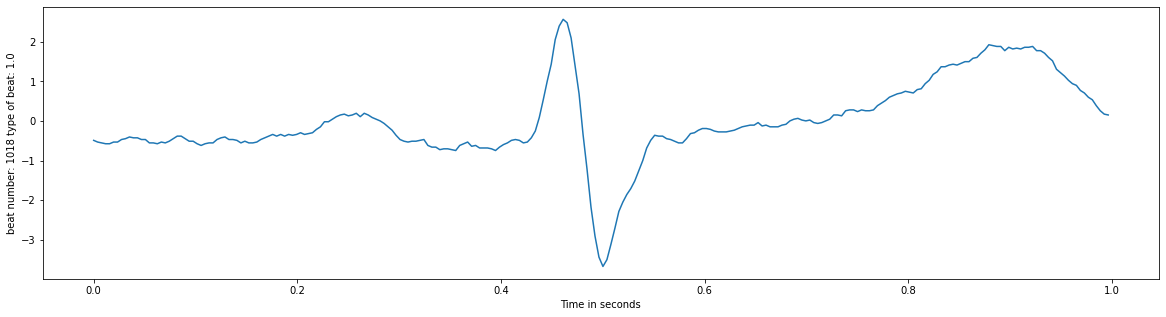

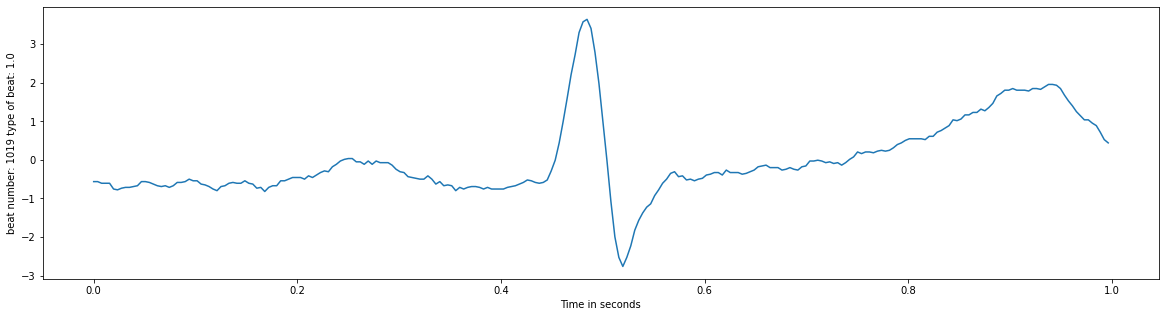

In [69]:
# data = np.loadtxt('/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/notebooks/data_ecg/100_MLII.csv', delimiter=',')
# data = all_data[0]
# print(data.shape)
# print(data[-2], data[-1])
for i in range(1000,1020):
    data = all_data[i]
# for beat_num in [7]:
    time_value = np.arange(256, dtype = 'float') / 256
    current_beat = data[:-3]
    ann_num = data[-3]
    plt.figure(figsize=(20,5))
    plt.plot(time_value, current_beat)
    plt.xlabel('Time in seconds')
    plt.ylabel('beat number: ' + str(i) + ' type of beat: ' + str(ann_num))

In [ ]:
print(all_data.shape)

## Resampling the data
### all the data from each class is sampled to the same number of beats by taking the mean of all the abnormal classes and then resampling all classes to that number

In [ ]:
# def downsample(arr, n):
#     rand_ind = np.random.choice(len(arr),size=n,replace=False) 
#     arr = np.delete(arr, rand_ind, 0)
#     return arr

# def upsample(arr,n):
#     rand_ind = np.random.choice(len(arr),size=n,replace=False)
#     rand_val = arr[rand_ind]
#     arr = np.append(arr,rand_val,axis=0)
#     return arr
seed=42
np.random.seed(seed)
def downsample(arr,n,seed):
    downsampled = slu.resample(arr,replace=False,n_samples=n,random_state=seed)
    return downsampled

def upsample(arr,n,seed):
    upsampled = slu.resample(arr,replace=True,n_samples=n,random_state=seed)
    return upsampled
    


In [ ]:
#discrepancy in number of heartbeats compared to histogram because here we are considering annotations from BOTH channels per patient
# whereas, rdann only reads the annotations once per patient
anno = all_data[:,-3]
normal = all_data[anno == 1.0]
lbbb = all_data[anno == 2.0]
rbbb = all_data[anno == 3.0]
apb = all_data[anno == 4.0]
pvc = all_data[anno == 5.0]
fvn = all_data[anno == 6.0]
fpn = all_data[anno == 7.0]
paced = all_data[anno == 8.0]

abnormal = [lbbb,rbbb,apb,pvc,fvn,fpn,paced]
list_len = [len(i) for i in abnormal]
print(list_len)

all_classes = [normal,lbbb,rbbb,apb,pvc,fvn,fpn,paced]

num_of_vals = np.mean(list_len, dtype=int)
# print(num_of_vals)

sampled_data = []
for i in all_classes:
    if i.shape[0] > num_of_vals:
        i = downsample(i, num_of_vals,seed)
    elif i.shape[0] < num_of_vals:
        i = upsample(i, num_of_vals,seed)
    sampled_data.append(i)


sampled_data = np.concatenate(sampled_data)
#print(sampled_data[0])
np.random.shuffle(sampled_data)
#print(sampled_data.shape)


with open('sampled_data.csv', 'wb') as s:
    np.savetxt(s,sampled_data,delimiter=',', fmt='%f')


In [ ]:

sampled = np.empty(shape=[0,433])
sampled_csv = glob('./sampled_data.csv')
#with open('./sampled_data.csv', 'rb') as sampled_csv:
for i in sampled_csv:
    print('Loading', i)
    row = np.loadtxt(i, delimiter=',')
    sampled = np.append(sampled, row, axis=0)
print(sampled.shape)

## Segmenting the data for training and testing using LOOCV Dataset A  
### Intra-patient

In [ ]:
#LOOCV within one patient, choose patient number
patient = 100
patient_sample = sampled[sampled[:,-1] == patient]
print(patient_sample.shape)

In [ ]:
# LOOCV function to split into train and test for one patient
# need to figure out average
def loocv(patient_sample):
    x = patient_sample[:,:-2]
    y = patient_sample[:,-2]
    group = patient_sample[:,-1]

    cv = LeaveOneOut()
    n = cv.get_n_splits(x,y=y,groups=group)
    #print(n)

    split = cv.split(X=x,y=y,groups=group)

    train = []
    test = []
    for train_index, test_index in split:
        train.append(train_index)
        test.append(test_index)

    train = np.array(train)
    test = np.array(test)
    x_train_data = x[train]
    x_test_data = x[test]
    y_train_data = y[train]
    y_test_data = y[test]
    
    return x_train_data, x_test_data, y_train_data, y_test_data


x_train_data, x_test_data, y_train_data, y_test_data = loocv(patient_sample)

In [ ]:
#Leave one patient out and store each segment in train test arrays
from sklearn.model_selection import LeaveOneGroupOut
def leave_one_patient():
    x = sampled[:,:-2]
    y = sampled[:,-2]
    groups = sampled[:,-1]
    lopo = LeaveOneGroupOut()
    lopo.get_n_splits(x,y,groups)
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    for train_index, test_index in lopo.split(x,y,groups):
        x_tr, x_te = x[train_index], x[test_index]
        y_tr, y_te = y[train_index], y[test_index]
        x_train.append(x_tr)
        x_test.append(x_te)
        y_train.append(y_tr)
        y_test.append(y_te)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = leave_one_patient()

In [ ]:
#calculates average for lopo and trains model, returns score
def score_calculator(model, X_train_arr, y_train_arr, x_test_arr, y_test_arr):
    score_arr = []
    for xtr, ytr, xt, yt in X_train_arr, y_train_arr, x_test_arr, y_test_arr:
        model.fit(xtr, ytr)
        model_pred = model.predict(xt)
        score = accuracy_score(yt, model_pred)
        score_arr.append(score)
    
    mean_score = np.mean(score_arr)
    return score_arr, mean_score
    

In [ ]:
#IGNORE = for old loocv
# fit = umap.UMAP()
# %time u = fit.fit_transform(x_train[0])

# x_tsne = TSNE(n_components=2, perplexity=5, random_state=seed).fit_transform(x_train)
# scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1], c = y_train, cmap=plt.cm.plasma)

In [ ]:
#IGNORE = for old loocv
# plt.figure(figsize=(10,6))

# scatter = plt.scatter(u[:,0], u[:,1], c=y_train[0], cmap= plt.cm.plasma)
# plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
# plt.xlabel('dimension 1')
# plt.ylabel('dimension 2')
# plt.title('UMAP of all heartbeats')

In [ ]:
#IGNORE = for old loocv - PCA
# from sklearn.decomposition import PCA
# x_pca = PCA(n_components=50,random_state=seed).fit_transform(x_train[0])

# scatter = plt.scatter(x_pca[:,0],x_pca[:,1], c=y_train[0])
# plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')

In [ ]:
#x_tsne = TSNE(n_components=2, perplexity=50, random_state=seed).fit_transform(x_pca)


In [ ]:
# fit = umap.UMAP()
# %time u = fit.fit_transform(x_tsne)


In [ ]:
# plt.figure(figsize=(10,10))
# scatter = plt.scatter(u[:,0],u[:,1], c = y_train[0])
# plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')

# 75/25 Train Test Split - Dataset B

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled[:,:-3], sampled[:,-3], test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#### Confusion Matrix Function

In [ ]:
# from sklearn.metrics import *
# import seaborn as sns

# #print(cf_matrix.size)
# # sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
# #             fmt='.2%', cmap='Blues')
# #https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

# def make_confusion_matrix(cf,
#                           group_names=None,
#                           categories='auto',
#                           count=True,
#                           percent=True,
#                           cbar=True,
#                           xyticks=True,
#                           xyplotlabels=True,
#                           sum_stats=True,
#                           figsize=None,
#                           cmap='Blues',
#                           title=None):
#     '''
#     This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
#     Arguments
#     ---------
#     cf:            confusion matrix to be passed in
#     group_names:   List of strings that represent the labels row by row to be shown in each square.
#     categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
#     count:         If True, show the raw number in the confusion matrix. Default is True.
#     normalize:     If True, show the proportions for each category. Default is True.
#     cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
#                    Default is True.
#     xyticks:       If True, show x and y ticks. Default is True.
#     xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
#     sum_stats:     If True, display summary statistics below the figure. Default is True.
#     figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
#     cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
#                    See http://matplotlib.org/examples/color/colormaps_reference.html
                   
#     title:         Title for the heatmap. Default is None.
#     '''


#     # CODE TO GENERATE TEXT INSIDE EACH SQUARE
#     blanks = ['' for i in range(cf.size)]

#     if group_names and len(group_names)==cf.size:
#         group_labels = ["{}\n".format(value) for value in group_names]
#     else:
#         group_labels = blanks

#     if count:
#         group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
#     else:
#         group_counts = blanks

#     if percent:
#         group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
#     else:
#         group_percentages = blanks

#     box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
#     box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


#     # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
#     if sum_stats:
#         #Accuracy is sum of diagonal divided by total observations
#         accuracy  = np.trace(cf) / float(np.sum(cf))

#         #if it is a binary confusion matrix, show some more stats
#         if len(cf)==2:
#             #Metrics for Binary Confusion Matrices
#             precision = cf[1,1] / sum(cf[:,1])
#             recall    = cf[1,1] / sum(cf[1,:])
#             f1_score  = 2*precision*recall / (precision + recall)
#             stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
#                 accuracy,precision,recall,f1_score)
#         else:
#             stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
#     else:
#         stats_text = ""


#     # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
#     if figsize==None:
#         #Get default figure size if not set
#         figsize = plt.rcParams.get('figure.figsize')

#     if xyticks==False:
#         #Do not show categories if xyticks is False
#         categories=False


#     # MAKE THE HEATMAP VISUALIZATION
#     plt.figure(figsize=figsize)
#     sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

#     if xyplotlabels:
#         plt.ylabel('True label')
#         plt.xlabel('Predicted label' + stats_text)
#     else:
#         plt.xlabel(stats_text)
    
#     if title:
#         plt.title(title)




## XGBOOST

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
# print(model.score(X_test, y_test))
#print(model)


In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

###### Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, figsize=(10,8), categories=['N', 'L', 'R', 'A', 'V', 'F', 'f','P'])

##### Precision, Accuracy, F1 score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision_micro = precision_score(y_test, predictions, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
precision_macro = precision_score(y_test, predictions, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
f1_macro = f1_score(y_test, y_pred, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
f1_micro = f1_score(y_test, y_pred, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
print(accuracy, precision_macro, precision_micro, f1_macro, f1_micro)

### UMAP fit on x_test

In [ ]:
fit = umap.UMAP()
%time u = fit.fit_transform(X_test)

### UMAP for xgboost

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=y_pred, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('UMAP of all heartbeats')

### UMAP on y_test

In [ ]:
# fit = umap.UMAP()
# %time u = fit.fit_transform(X_test)

plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=y_test, cmap= plt.cm.plasma) 
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('UMAP of all heartbeats')

### PCA and t-SNE on XGBoost

In [ ]:
#y_test and y_pred for comparison - PCA and tsne
# from sklearn.decomposition import PCA
# patient = 112
# pat_samp = sampled[sampled[:,-1]==patient]
# x = pat_samp[:,:-2]
# y = pat_samp[:,-2]
# pca = PCA(n_components=50,random_state=seed)
# x_pca = pca.fit_transform(x[:,:-2])
# plt.figure(figsize=(10,6))
# scatter = plt.scatter(x_pca[:,0],x_pca[:,1], c=y)
# plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')


In [ ]:
# var_rat = pca.explained_variance_ratio_
# var_total = np.sum(var_rat)
# print(var_total)

## Support Vector Machines

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(sampled[:,:-2])
feature_scaled = scaler1.transform(sampled[:,:-2])

pca1 = PCA(n_components=4)
pca1.fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)

print(feature_scaled_pca.shape)

In [ ]:
# plt.figure(figsize=(20,10))
# plt.scatter(
#     x=feature_scaled_pca[:,0],
#     y=feature_scaled_pca[:,1], 
#     c=sampled[:,-2],
#     cmap='tab10'
# )
# plt.set_xlabel('pca-one')
# plt.set_ylabel('pca-two')

# plt.show()

In [ ]:
#pca and tsne on y_test and then y_pred to compare
from sklearn import svm
linear = svm.SVC(kernel='linear')
linear.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
predictions_lin = linear.predict(X_test)
accuracy_lin = accuracy_score(y_test, predictions_lin)
print(accuracy_lin)

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_lin, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Linear SVM Predictions')

In [ ]:
quad = svm.SVC(kernel='poly', degree=2)
quad.fit(X_train,y_train)

In [ ]:
predictions_quad = quad.predict(X_test)
accuracy_quad = accuracy_score(y_test, predictions_quad)
print(accuracy_quad)

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_quad, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Quadratic SVM Predictions')

In [ ]:
cubic = svm.SVC(kernel='poly', degree=3)
cubic.fit(X_train,y_train)

In [ ]:
predictions_cubic = cubic.predict(X_test)
accuracy_cubic = accuracy_score(y_test, predictions_cubic)
print(accuracy_cubic)

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_cubic, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('Cubic SVM Predictions')

In [ ]:
rbf = svm.SVC(kernel='rbf')
rbf.fit(X_train,y_train)
predictions_rbf = rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, predictions_rbf)
print(accuracy_rbf)

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_rbf, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='upper right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('RBF SVM Predictions')

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
clf.fit(X_train, y_train)
predictions_rbf_2 = clf.predict(X_test)

In [ ]:
accuracy_rbf_2 = accuracy_score(y_test, predictions_rbf_2)
print(accuracy_rbf_2)

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(u[:,0], u[:,1], c=predictions_rbf_2, cmap= plt.cm.plasma) #need to do y_test for comparison
plt.legend(*scatter.legend_elements(), title="Classes",loc='lower right')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('RBF 2 Predictions')

# UMAP for classification

In [ ]:
# %%time
# u = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=30, metric='euclidean').fit_transform(X_train, y=y_train)

In [ ]:
# fig, ax = plt.subplots(1, figsize=(14, 10))
# plt.scatter(*embedding.T, s=0.5, c=y_train, cmap='Spectral', alpha=1.0)
# plt.setp(ax, xticks=[], yticks=[])
# cbar = plt.colorbar(boundaries=np.arange(9))
# cbar.set_ticks(np.arange(8))
# cbar.set_ticklabels([1,2,3,4,5,6,7,8])
# plt.title('Fashion MNIST Embedded via UMAP using Labels');

# title="UMAP"
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(u[:,10], u[:,15], u[:,29], c=y_train, s=100)
# plt.title(title, fontsize=18)
